Josip Koprčina, Data Mining Project 2020/2021 \
A simple project to find out what features of a league of legends game (https://riot.com/3nCKCsN) influence winning the most.

In [27]:
# Importing needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

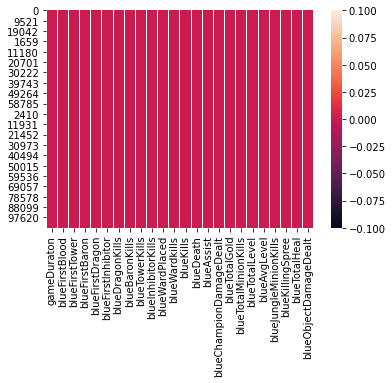

In [28]:
# Importing data 
data_challenger = pd.read_csv("./data/Challenger_Ranked_Games.csv") 
data_grand_master = pd.read_csv("./data/GrandMaster_Ranked_Games.csv")
data_master = pd.read_csv("./data/Master_Ranked_Games.csv")
frames = [data_challenger, data_grand_master, data_master]
data = pd.concat(frames)
    
# Removing red-side information because most is symetric to blue-side data
# Removing win label from X and making y out of it
data = data[data.columns[0:26]]
y = data[data.columns[2]]
X = pd.DataFrame(data)
del X["gameId"]
del X['blueWins']

features = list(X.columns)
labels = ["Win", "Lose"]

# Checking are there any null values in my dataset just in case
sns.heatmap(X.isnull())

In [29]:
# Splitting into random 10-k folds and using decision trees

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[32104   972]
 [ 1041 31859]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     33076
           1       0.97      0.97      0.97     32900

    accuracy                           0.97     65976
   macro avg       0.97      0.97      0.97     65976
weighted avg       0.97      0.97      0.97     65976



In [30]:
# Plotting the quality of our decision tree model

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="blue" label = "ROC value")

x = [i for i in range(1,100)]
plt.plot([i/100 for i in range(len(x))], [i/100 for i in range(len(x))], color="orange", label = "Values if predicitons are correct 50% of the time")

plt.xlabel('Values entered as depth')
plt.ylabel('Error on certain depth ( 1 - precision )')
plt.title('Model efficency')
plt.legend()
plt.show()
print("Figure 1:")

SyntaxError: invalid syntax (<ipython-input-30-ef792fd5ad8f>, line 4)

In [ ]:
# Using logistic regression to classify

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Plotting the quality of our regression model

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="green", label = "ROC value")

x = [i for i in range(1,100)]
plt.plot([i/100 for i in range(len(x))], [i/100 for i in range(len(x))], color="orange", label = "Values if predicitons are correct 50% of the time")

plt.xlabel('Values entered as depth')
plt.ylabel('Error on certain depth ( 1 - precision )')
plt.title('Model efficency')
plt.legend()
plt.show()
print("Figure 1:")

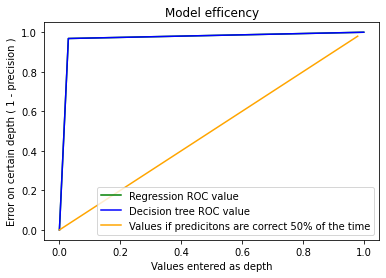

Figure 1:


In [32]:
# Plotting the comparison of our models

fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_pred)
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr1, tpr1, color="blue", label = "Decision tree ROC value")
plt.plot(fpr2, tpr2, color="green", label = "Regression ROC value")

x = [i for i in range(1,100)]
plt.plot([i/100 for i in range(len(x))], [i/100 for i in range(len(x))], color="orange", label = "Values if predicitons are correct 50% of the time")

plt.xlabel('Values entered as depth')
plt.ylabel('Error on certain depth ( 1 - precision )')
plt.title('Model efficency')
plt.legend()
plt.show()
print("Figure 1:")